<h1 align='center'><b> Data Science Salary Analysis </b></h1>

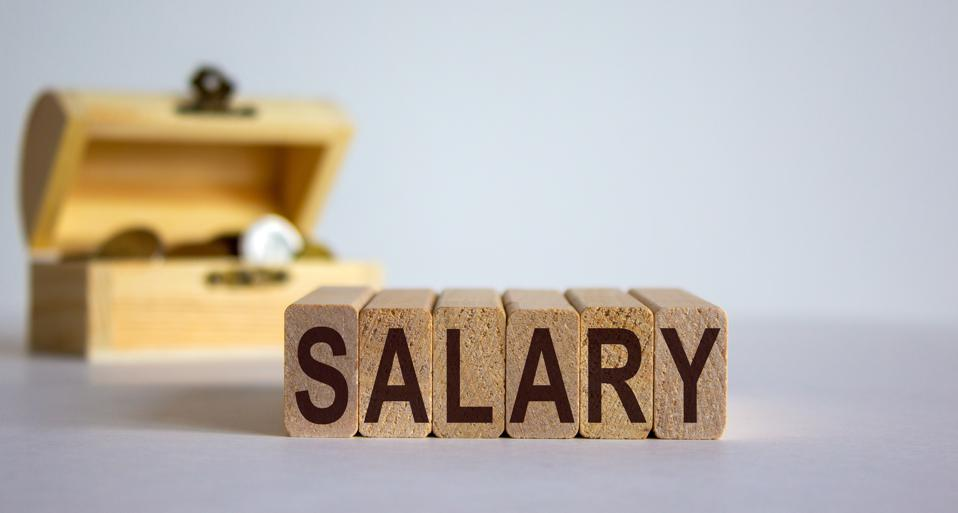

1. [Introduction](#1) <a id=18></a>
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Data Source Links](#31)
    - 1.3 [Task](#4)
2. [Preparation](#5)
    - 2.1 [Packages](#6)
    - 2.2 [Data](#7)
    - 2.3 [Understanding Data](#8)
3. [Exploratory Data Analysis](#15)
    - 3.1 [Univariate Analysis](#16)
    - 3.2 [Bivariate Analysis](#17)
    - 3.3 [Some Other Relations that seems Intuitive](#19)
4. [Conclusions from EDA](#21)

## 1. Introduction <a id=1></a>



### 1.1 Data Dictionary <a id=2></a>
<table>
    <tr>
        <td><b> Column </b></td>
        <td><b> Description </b></td>
    </tr>
    <tr>
        <td>work_year</td>
        <td>The year the salary was paid.</td>
    </tr>
    <tr>
        <td>experience_level</td>
        <td>The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director</td>
    </tr>
    <tr>
        <td>employment_type</td>
        <td>The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance</td>
    </tr>
    <tr>
        <td>job_title</td>
        <td>The role worked in during the year.</td>
    </tr>
    <tr>
        <td>salary</td>
        <td>The total gross salary amount paid.</td>
    </tr>
    <tr>
        <td>salary_currency</td>
        <td>The currency of the salary paid as an ISO 4217 currency code.</td>
    </tr>
    <tr>
        <td>salaryinusd</td>
        <td>The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).</td>
    </tr>
    <tr>
        <td>employee_residence</td>
        <td>Employee's primary country of residence in during the work year as an ISO 3166 country code.</td>
    </tr>
    <tr>
        <td>remote_ratio</td>
        <td>The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)</td>
    </tr>
    <tr>
        <td>company_location</td>
        <td>The country of the employer's main office or contracting branch as an ISO 3166 country code.</td>
    </tr>
    <tr>
        <td>company_size</td>
        <td>The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)</td>
    </tr>
 </table>

### 1.2 Data Source Links <a id=3></a>

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

### 1.3 Task <a id=4></a>

To perform exploratory data analysis to find important insights into salaries of data science professionals.

## 2. Preparation <a id=5></a>

### 2.1 Packages <a id=6></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 2.2 Data <a id=7></a>

In [2]:
df = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv', index_col=[0])

### 2.3 Understanding Data <a id=8></a>

#### 2.3.1 The shape of the data <a id=9></a>

In [3]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (607, 11)


#### 2.3.2 Preview of the first 5 rows of dataset <a id=10></a>

In [4]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### 2.3.3 Checking the number of unique values  in each column <a id=11></a>

In [5]:
dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()


,unique value count
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3
company_location,50


#### 2.3.4 Separating Categorical and Continuous variables <a id=12></a>

In [6]:
cat_cols = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 
            'employee_residence', 'remote_ratio', 'company_location', 'company_size']
con_cols = ['salary', 'salary_in_usd']

print("There are {} Categorical cols : {}".format(len(cat_cols), cat_cols))
print("There are {} Continuous cols : {}".format(len(con_cols), con_cols))

There are 9 Categorical cols : ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
There are 2 Continuous cols : ['salary', 'salary_in_usd']


#### 2.3.5 Summary statistics for continuous cols <a id=13></a>

In [7]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0


There is a high variation in given salaries.

#### 2.3.6 Missing Values <a id=14></a>

In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There is no missing values in given dataset.

## 3. Exploratory Data Analysis <a id=15></a>

### 3.1 Univariate Analysis <a id=16></a>

#### 3.1.1 Count plot for categorical variables

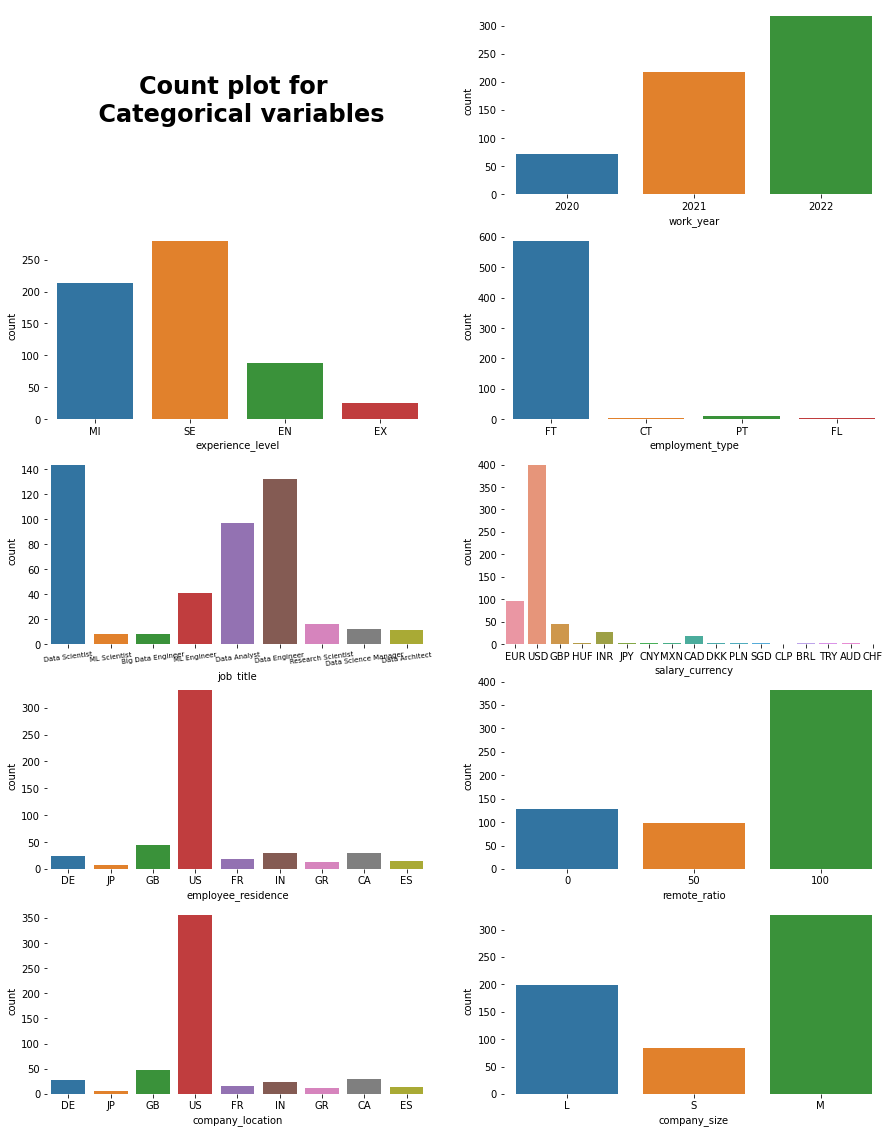

In [9]:
fig = plt.figure(figsize=(15,20))
gs = fig.add_gridspec(5, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.text(x=0.5, y=0.5, s="Count plot for \n Categorical variables",
        verticalalignment='center', horizontalalignment='center',
        fontsize='24', fontweight='bold')
ax0.tick_params(bottom=False, left=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax1 = fig.add_subplot(gs[0, 1])
sns.countplot(ax=ax1, data=df, x=cat_cols[0])
plt.xticks(rotation=0)

ax2 = fig.add_subplot(gs[1, 0])
sns.countplot(ax=ax2, data=df, x=cat_cols[1])
plt.xticks(rotation=0)

ax3 = fig.add_subplot(gs[1,1])
sns.countplot(ax=ax3, data=df, x=cat_cols[2])
plt.xticks(rotation=0)

ax4 = fig.add_subplot(gs[2,0])

df_top_feature_values = df[cat_cols[3]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(9)

sns.countplot(ax=ax4, data=df[df[cat_cols[3]].isin(top_values)], x=cat_cols[3])
trimmed_xlabels = [s.get_text().replace('Machine Learning', 'ML') for s in ax4.get_xticklabels()]
ax4.set_xticklabels(trimmed_xlabels)
plt.xticks(rotation=7, fontsize=7)

ax5 = fig.add_subplot(gs[2,1])
sns.countplot(ax=ax5, data=df, x=cat_cols[4])
plt.xticks(rotation=0)

df_top_feature_values = df[cat_cols[5]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(9)

ax6 = fig.add_subplot(gs[3,0])
sns.countplot(ax=ax6, data=df[df[cat_cols[5]].isin(top_values)], x=cat_cols[5])
plt.xticks(rotation=0)

ax7 = fig.add_subplot(gs[3,1])
sns.countplot(ax=ax7, data=df, x=cat_cols[6])
plt.xticks(rotation=0)

df_top_feature_values = df[cat_cols[7]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(9)

ax8 = fig.add_subplot(gs[4,0])
sns.countplot(ax=ax8, data=df[df[cat_cols[7]].isin(top_values)], x=cat_cols[7])
plt.xticks(rotation=0)

ax9 = fig.add_subplot(gs[4,1])
sns.countplot(ax=ax9, data=df, x=cat_cols[8])
plt.xticks(rotation=0)

for s in ['left', 'right', 'top', 'bottom']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)
    ax9.spines[s].set_visible(False)
plt.xticks(rotation=0)
plt.show()

#### 3.1.2 Boxen plot for continuous variables

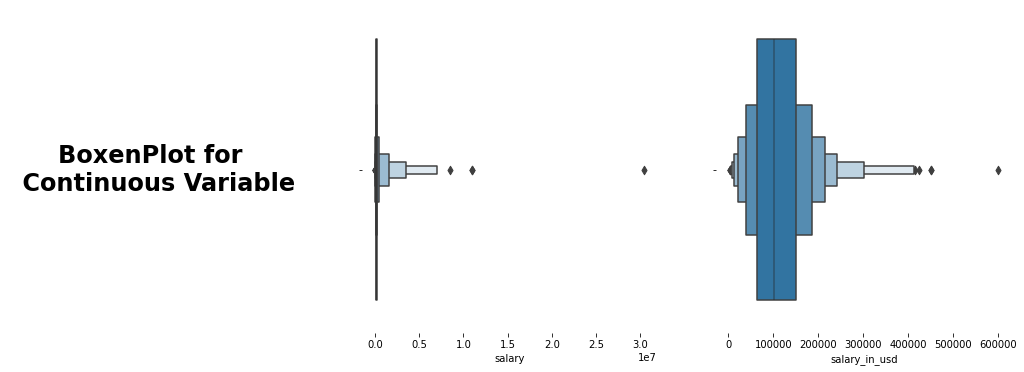

In [10]:
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(gs[0,0])
ax0.text(x=0.5, y=0.5, s="BoxenPlot for \n Continuous Variable",
        fontsize=24, fontweight='bold',
        horizontalalignment='center', verticalalignment='center')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)


ax1 = fig.add_subplot(gs[0,1])
sns.boxenplot(data=df, x=con_cols[0])


ax2 = fig.add_subplot(gs[0,2])
sns.boxenplot(data=df, x=con_cols[1])

for s in ['top', 'bottom', 'left', 'right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

plt.show()

salary (in native currency) has an outliers, removing outliers to have better look on boxenplot.

#### 3.1.3 Boxenplot for continuous variables (without outliers)

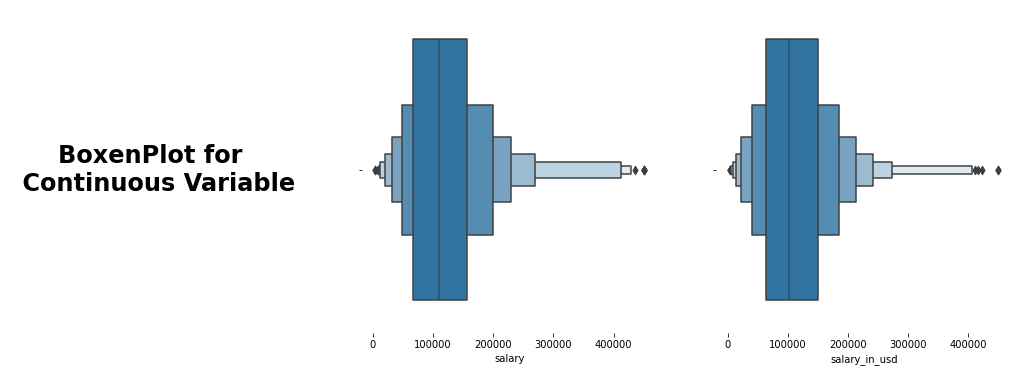

In [11]:
fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)

ax0 = fig.add_subplot(gs[0,0])
ax0.text(x=0.5, y=0.5, s="BoxenPlot for \n Continuous Variable",
        fontsize=24, fontweight='bold',
        horizontalalignment='center', verticalalignment='center')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)


ax1 = fig.add_subplot(gs[0,1])
sns.boxenplot(data=df[df[con_cols[0]] < 6e5], x=con_cols[0])


ax2 = fig.add_subplot(gs[0,2])
sns.boxenplot(data=df[df[con_cols[1]] < 5e5], x=con_cols[1])

for s in ['top', 'bottom', 'left', 'right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

plt.show()

### 3.2 Bivariate Analysis <a id=17></a>

#### 3.2.1 Correlation Matrix of continuous features

<AxesSubplot:>

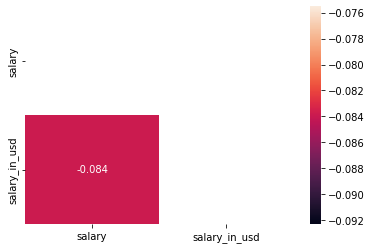

In [12]:
df_corr = df[con_cols].corr().transpose()

mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, mask=mask)

USD exchange rates for different currencies are different and should not have a simple relation between them. Hence, correlation value b/w salary & salary_in_usd is very low.

#### 3.2.2 Scatterplot heatmap of dataframe

<Figure size 432x432 with 0 Axes>

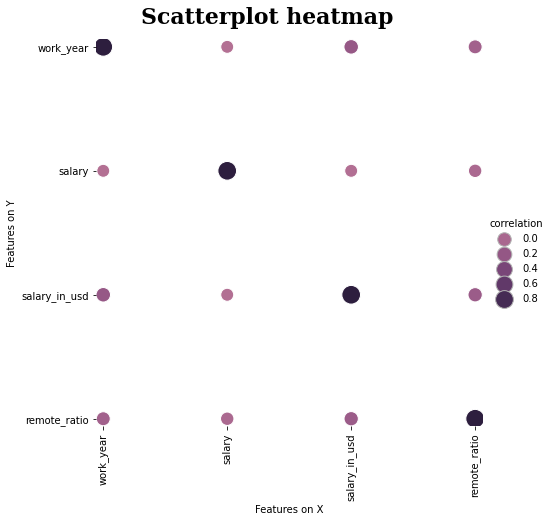

In [13]:
fig = plt.figure(figsize=(6, 6))
corr_mat = df.corr().stack().reset_index(name='correlation')

grid = sns.relplot(data=corr_mat, x='level_0', y='level_1', hue='correlation', hue_norm=(-1, 1),
           height=7, sizes=(150, 350), size_norm=(-.2, 1), size='correlation')

grid.set(xlabel="Features on X", ylabel="Features on Y", aspect="equal")
grid.despine(left=True, bottom=True)
grid.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif')
grid.ax.margins(.02)

for label in grid.ax.get_xticklabels():
    label.set_rotation(90)
for artist in grid.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

#### 3.2.3 Distribution of categorical features against salary

<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

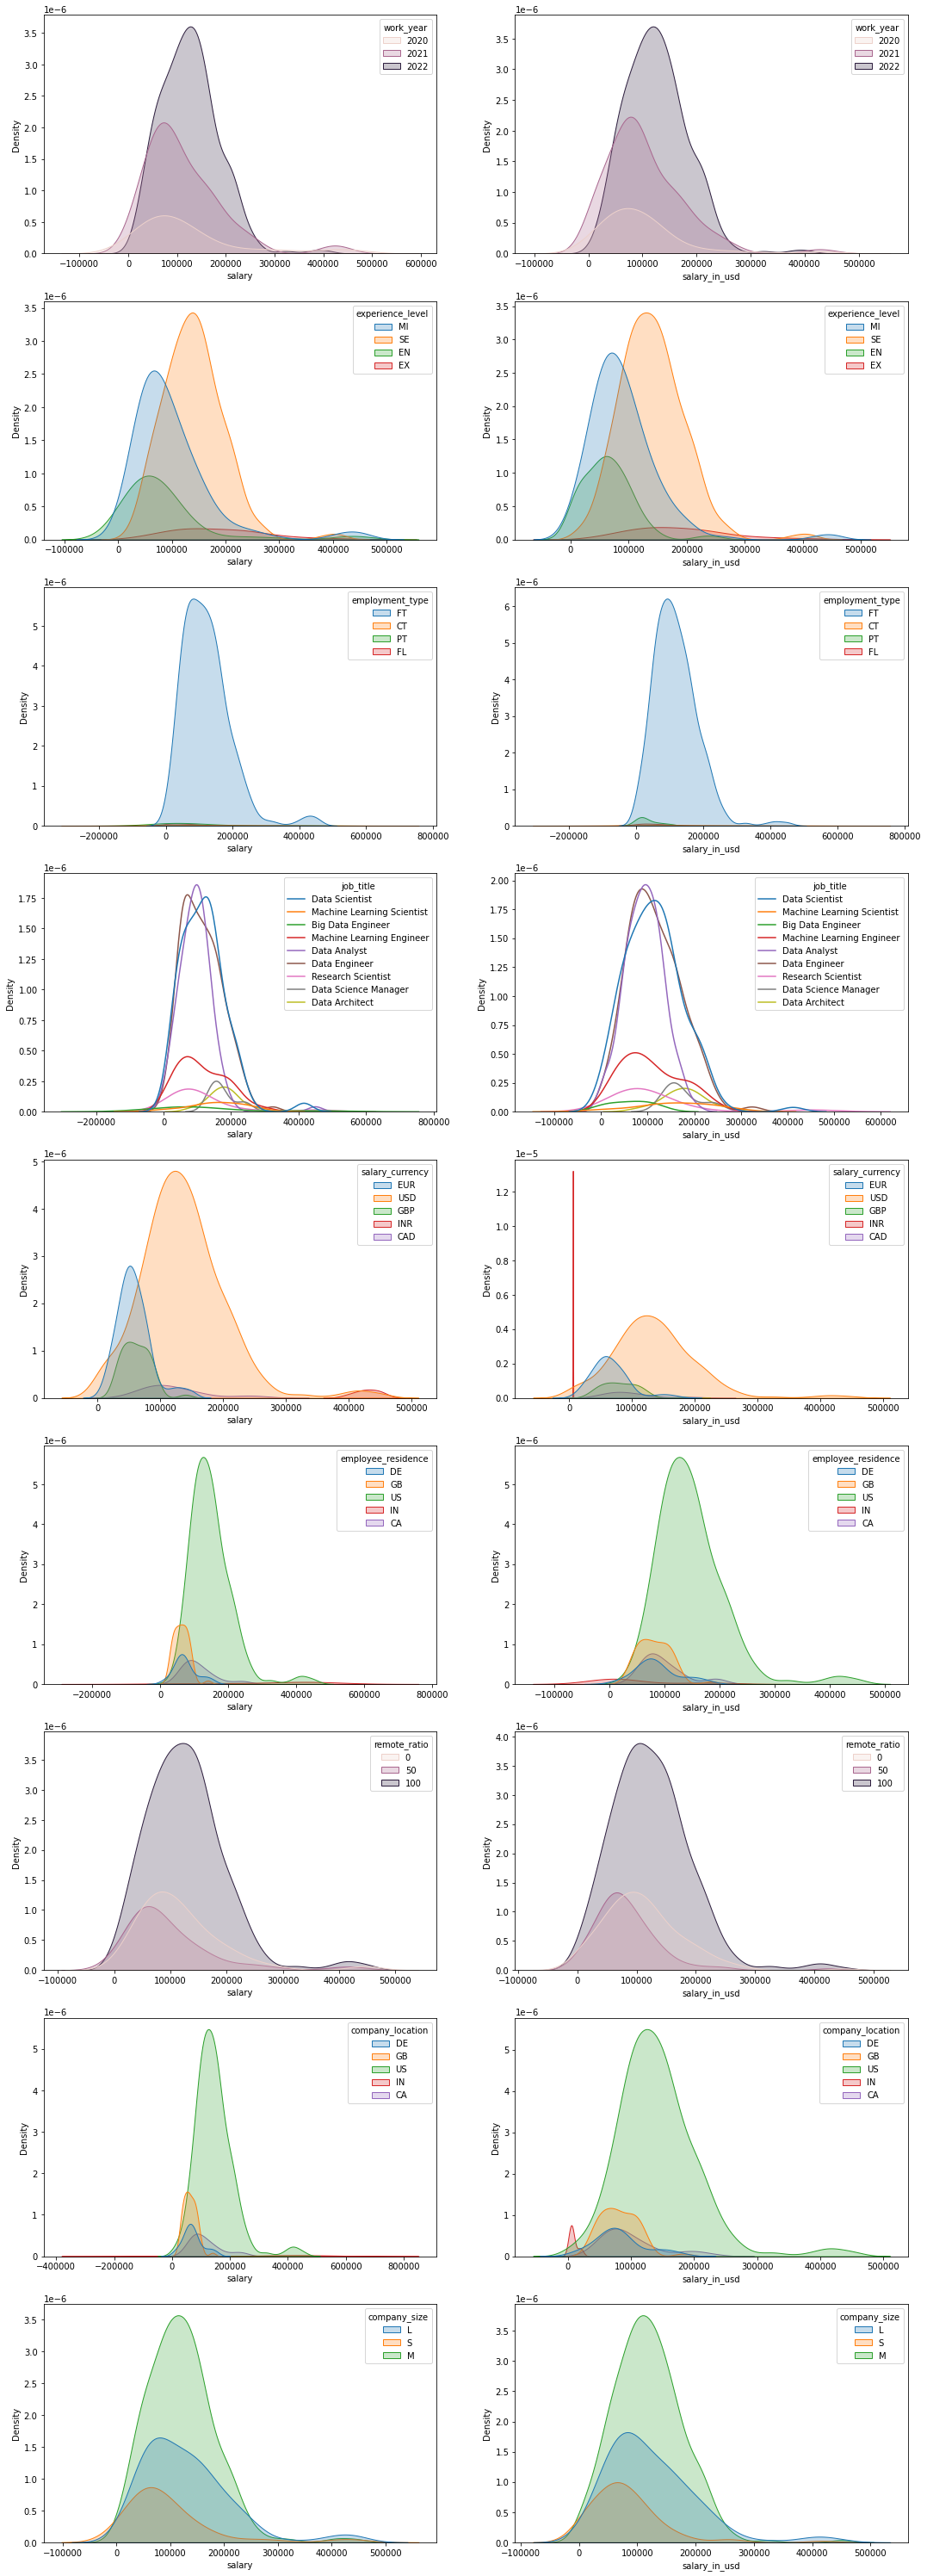

In [14]:
fig = plt.figure(figsize=(18,54))
gs = fig.add_gridspec(9,2)

df_copy = df

# Removing outlier values of salary column to get better visualization.
df_copy = df_copy[df_copy[con_cols[0]] < 6e5]
df_copy = df_copy[df_copy[con_cols[1]] < 5e5]

ax0 = fig.add_subplot(gs[0,0])
sns.kdeplot(ax=ax0, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[0])
ax1 = fig.add_subplot(gs[0,1])
sns.kdeplot(ax=ax1, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[0])


ax2 = fig.add_subplot(gs[1,0])
sns.kdeplot(ax=ax2, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[1])
ax3 = fig.add_subplot(gs[1,1])
sns.kdeplot(ax=ax3, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[1])


ax4 = fig.add_subplot(gs[2,0])
sns.kdeplot(ax=ax4, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[2])
ax5 = fig.add_subplot(gs[2,1])
sns.kdeplot(ax=ax5, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[2])

df_top_feature_values = df[cat_cols[3]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(9)

ax6 = fig.add_subplot(gs[3,0])
sns.kdeplot(ax=ax6, data=df_copy[df_copy[cat_cols[3]].isin(top_values)], x=con_cols[0], fill=False, hue=cat_cols[3])
ax7 = fig.add_subplot(gs[3,1])
sns.kdeplot(ax=ax7, data=df_copy[df_copy[cat_cols[3]].isin(top_values)], x=con_cols[1], fill=False, hue=cat_cols[3])

df_top_feature_values = df[cat_cols[4]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(5)

ax8 = fig.add_subplot(gs[4,0])
sns.kdeplot(ax=ax8, data=df_copy[df_copy[cat_cols[4]].isin(top_values)], x=con_cols[0], fill=True, hue=cat_cols[4])
ax9 = fig.add_subplot(gs[4,1])
sns.kdeplot(ax=ax9, data=df_copy[df_copy[cat_cols[4]].isin(top_values)], x=con_cols[1], fill=True, hue=cat_cols[4])

df_top_feature_values = df[cat_cols[5]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(5)

ax10 = fig.add_subplot(gs[5,0])
sns.kdeplot(ax=ax10, data=df_copy[df_copy[cat_cols[5]].isin(top_values)], x=con_cols[0], fill=True, hue=cat_cols[5])
ax11 = fig.add_subplot(gs[5,1])
sns.kdeplot(ax=ax11, data=df_copy[df_copy[cat_cols[5]].isin(top_values)], x=con_cols[1], fill=True, hue=cat_cols[5])

ax12 = fig.add_subplot(gs[6,0])
sns.kdeplot(ax=ax12, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[6])
ax13 = fig.add_subplot(gs[6,1])
sns.kdeplot(ax=ax13, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[6])

df_top_feature_values = df[cat_cols[7]].value_counts().reset_index()
df_top_feature_values.columns = ['col_values', 'value_count']
top_values = df_top_feature_values['col_values'].head(5)

ax14 = fig.add_subplot(gs[7,0])
sns.kdeplot(ax=ax14, data=df_copy[df_copy[cat_cols[7]].isin(top_values)], x=con_cols[0], fill=True, hue=cat_cols[7])
ax15 = fig.add_subplot(gs[7,1])
sns.kdeplot(ax=ax15, data=df_copy[df_copy[cat_cols[7]].isin(top_values)], x=con_cols[1], fill=True, hue=cat_cols[7])

ax16 = fig.add_subplot(gs[8,0])
sns.kdeplot(ax=ax16, data=df_copy, x=con_cols[0], fill=True, hue=cat_cols[8])
ax17 = fig.add_subplot(gs[8,1])
sns.kdeplot(ax=ax17, data=df_copy, x=con_cols[1], fill=True, hue=cat_cols[8])

### 3.3 Some Other Relations that seems Intuitive<a id=19></a>

#### 3.3.1 Year-on-Year basis increase in salary in USD (Rolling year return)

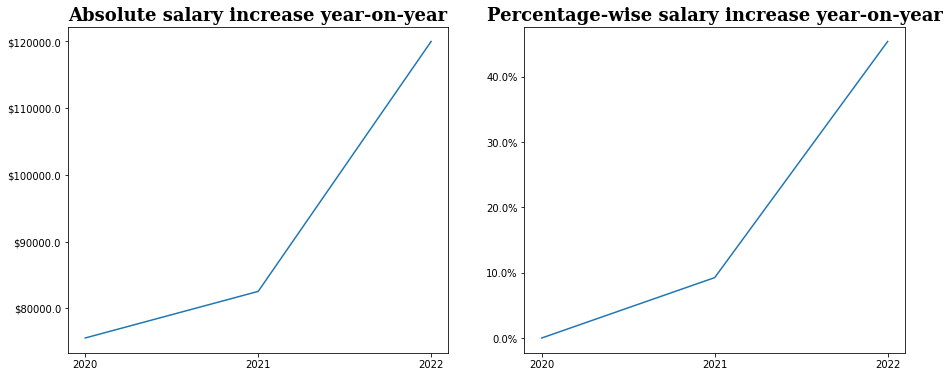

In [15]:
yr_2020 = df[df['work_year'] == 2020]['salary_in_usd'].median()
yr_2021 = df[df['work_year'] == 2021]['salary_in_usd'].median()
yr_2022 = df[df['work_year'] == 2022]['salary_in_usd'].median()

fig = plt.figure(figsize=(15,6))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
grid = sns.lineplot(ax=ax0, y=[yr_2020, yr_2021, yr_2022], x=[2020, 2021, 2022])
plt.title('Absolute salary increase year-on-year',fontsize=18, fontweight='bold', fontfamily='serif')
ax0.set_xticks([2020, 2021, 2022])
ax0.set_yticklabels(['$'+ str(s) for s in ax0.get_yticks()])

ax1 = fig.add_subplot(gs[0,1])
sns.lineplot(ax=ax1, y=[0, (yr_2021-yr_2020)*100/yr_2020, (yr_2022-yr_2021)*100/yr_2021], x=[2020, 2021, 2022])
plt.title('Percentage-wise salary increase year-on-year',fontsize=18, fontweight='bold', fontfamily='serif')
ax1.set_xticks([2020, 2021, 2022])
_ = ax1.set_yticklabels([str(s) + '%' for s in ax1.get_yticks()])

## 4. Conclusions from EDA <a id=21></a>

1. The dataset has 607 samples having 11 feature variables out of which 9 are categorical features and 2 are continuous features.
2. There are no missing values in the data.
#### Univariate Analysis Conclusions
3. Majority of the Data science professionals are working as full time employee.
4. Most common job_title in data science fields are:
    - Data Scientist
    - Data Engineer
    - Data Analyst
    - Machine Learning Engineer
5. In 54% samples employee_residence is US and in 58% of the company location is also US. We may infer that US has maximum data science opportunities but as data gathering procedure is not mentioned, we cannot strongly hold this claim as data source can be bias towards selected countries entries.
#### Bivariate Analysis Conclusions 
6. There is a increase in `Salary` year-on-year basis. 9.3% in year 2020-21 and 45.4% in year 2021-22.
7. `Salary` is directly proporptional to `experience_level` that means higher the experience, higher the salary.
8. Data Science Salaries are higher in US comparing to other western countries, India on the other hand has lower salaries. It makes sense as developed countries would have more salaries than developing countries for the same data science roles.
9. Half of the data science professional are employed in medium sized companies.
10. Salary in medium sized comapany is 10% higher than large sized company and 70% higher than small sized company. (Used median for calculations.


### If you like the notebook, consider giving an upvote.
Check my other notebooks 

1. https://www.kaggle.com/code/crashoverdrive/studentsperformance-data-visualization-beginners
2. https://www.kaggle.com/code/crashoverdrive/heart-attack-analysis-prediction-90-accuracy
3. https://www.kaggle.com/code/crashoverdrive/song-popularity-prediction-visualizations